# Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [213]:
# read the file
# The CSV file is downloaded from https://www.kaggle.com.
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# in this data file, I don't need some column for train my model
# RowNumber, CustomerId, Surname

df_new = df.drop(['RowNumber','CustomerId','Surname'],axis='columns')
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# check the information about the data.
# And check the null value also

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# DATA VISUALIZATION

<Axes: xlabel='Exited', ylabel='count'>

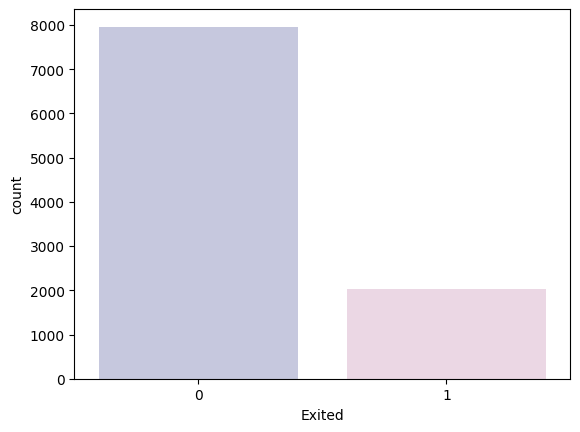

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= df_new["Exited"], palette= cols)

<ipython-input-191-a6a2f37f9fa5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_new.corr()


<Axes: >

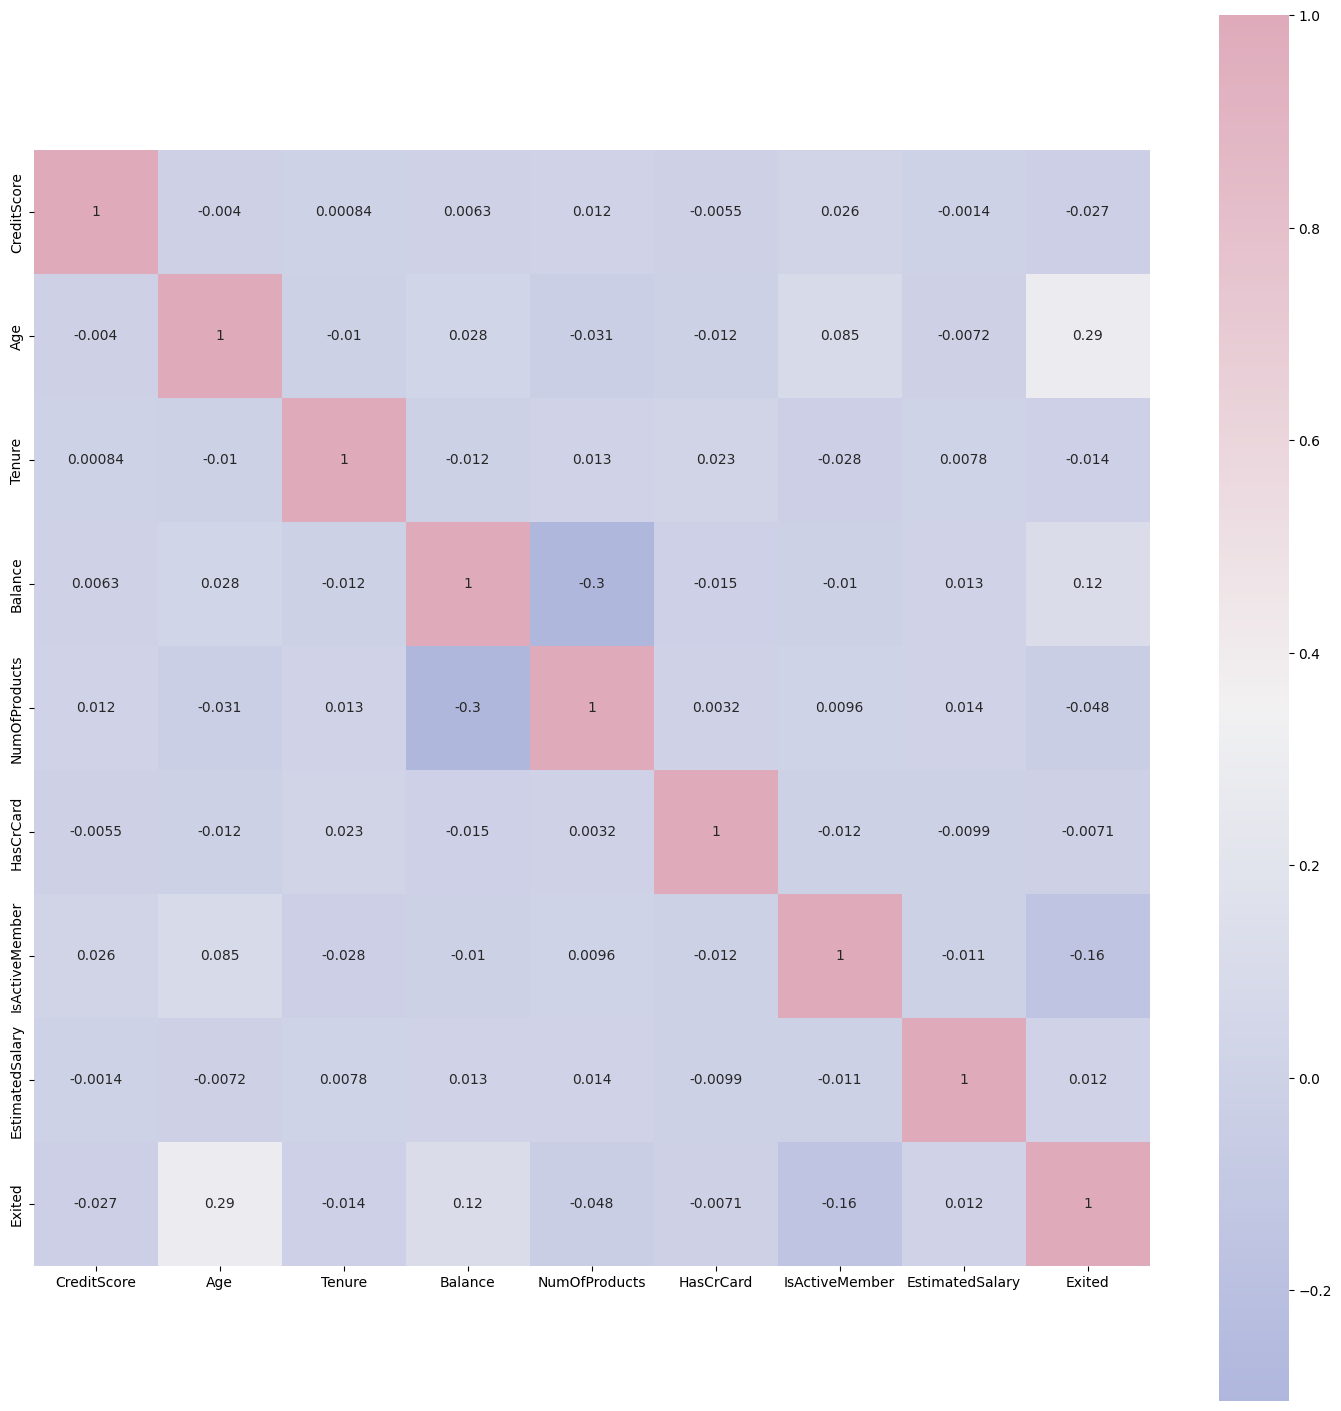

In [ ]:
# Correlation amongst numeric attributes
corrmat = df_new.corr()
#cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [ ]:
# check the categorical variables and neumeric variables

# categorical variables
cat = (df_new.dtypes == "object")
object_cols = list(cat[cat].index)

print("Categorical variables:")
print(object_cols)

# neumeric variables
num = (df_new.dtypes == "float64")
num_cols = list(num[num].index)

print("Neumeric variables (float64):")
print(num_cols)

int_num = (df_new.dtypes == "int64")
int_cols = list(int_num[int_num].index)

print("Neumeric variables: (int64)")
print(int_cols)

Categorical variables:
['Geography', 'Gender']
Neumeric variables (float64):
['Balance', 'EstimatedSalary']
Neumeric variables: (int64)
['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


In [ ]:
# check the missing values in categorical variables

for i in object_cols:
    print(i, df_new[i].isnull().sum())



Geography 0
Gender 0


In [ ]:
# check the missing values in float64 variables

for i in num_cols:
    print(i, df_new[i].isnull().sum())

Balance 0
EstimatedSalary 0


In [ ]:
# check the missing values in int64 variables

for i in int_cols:
    print(i, df_new[i].isnull().sum())

CreditScore 0
Age 0
Tenure 0
NumOfProducts 0
HasCrCard 0
IsActiveMember 0
Exited 0


# DATA PREPROCESSING

In [ ]:
# Apply label encoder to  categorical data

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for i in object_cols:
    df_new[i] = label_encoder.fit_transform(df_new[i])
    
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


# MODEL BUILDING

In [ ]:
from sklearn.model_selection import train_test_split

X = df_new.drop(["Exited"], axis=1)
y = df_new["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape {} ".format(X_train.shape))
print("X_test shape {} ".format(X_test.shape))


X_train shape (8000, 10) 
X_test shape (2000, 10) 


Text(0.5, 1.0, 'Check Balance of the the Train Data')

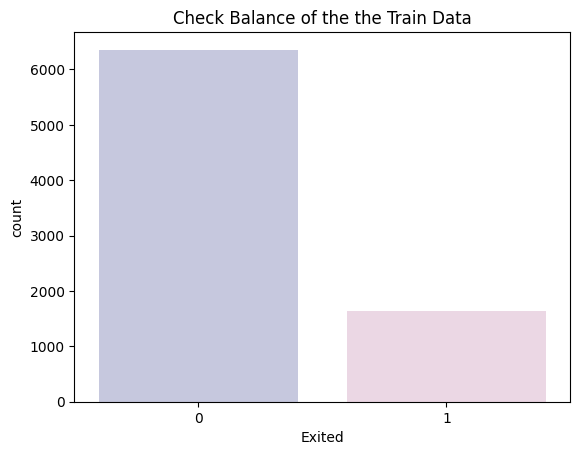

In [ ]:
# check balance of the the test data and train data
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x=y_train, palette= cols)
plt.title("Check Balance of the the Train Data")

Text(0.5, 1.0, 'Check Balance of the the Test Data')

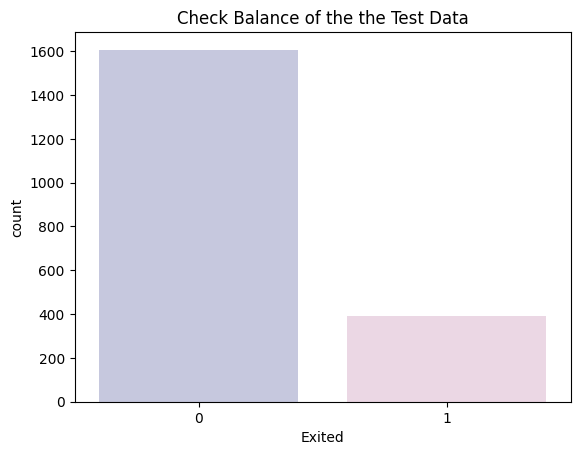

In [ ]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x=y_test, palette= cols)
plt.title("Check Balance of the the Test Data")

In [ ]:
# First, I checked my data with Logistic Regression before go to ANN
# Accuracy of my Logistic Regression model is about 80%

from sklearn import linear_model

logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)

logr.score(X_test,y_test)



0.8005

In [ ]:
#use ANN

from keras.models import Sequential
from keras.layers import Dense

#initialized the ANN
ann = Sequential()

In [ ]:
#add the input layer and first hidden layer
ann.add(Dense(activation = 'relu', input_dim = 10, units=5, kernel_initializer='normal'))

In [ ]:
# #add the other hidden layers
ann.add(Dense(activation = 'relu', units=5, kernel_initializer='normal'))

In [ ]:
#add output layer
ann.add(Dense(activation = 'sigmoid', units=1, kernel_initializer='normal')) 

In [ ]:
# from keras.optimizers import Adam
# from keras import callbacks

# #Early stopping
# early_stopping = callbacks.EarlyStopping(
#     min_delta=0.001, # minimium amount of change to count as an improvement
#     patience=20, # how many epochs to wait before stopping
#     restore_best_weights=True,
# )

# opt = Adam(learning_rate=0.00009)

In [ ]:
# ann.compile(optimizer=opt, loss = 'binary_crossentropy', metrics=['accuracy'])
ann.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
#batch size --> A good starting point for selecting the batch size is to use a power of 2 such as 32, 64, 128, or 256.
ann.fit(X_train, y_train, batch_size=32, epochs=100)
#ann.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
250/250 [==============================] - 2s 7ms/step - loss: 0.6362 - accuracy: 0.7869
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5464 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5254 - accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.7945
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5146 - accuracy: 0.7945
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5092 - accuracy: 0.7945
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.7945
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7945
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7945
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5091 - accura

In [ ]:
# evaluate the model on the test set
loss, accuracy = ann.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

63/63 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.8035
Test loss: 0.49511536955833435
Test accuracy: 0.8034999966621399


In [ ]:
# Accuracy

#Using Logistic Regression = 80.05%

#Using ANN with 1 hidden layers = 80.35%
#Using ANN with 2 hidden layers = 80.35%

In [ ]:
# # from sklearn.metrics import accuracy_score
# # import numpy as

# # # Evaluate the model on the test set
# # y_pred = ann.predict(X_test)
# # y_pred = np.round(y_pred)
# # accuracy = accuracy_score(y_test, y_pred)

# # # Print the accuracy of the model
# # print("Accuracy:", accuracy)


# #from sklearn.metrics import confusion_matrix

# # Calculate the confusion matrix
# y_pred = model.predict(X_test)
# y_pred = np.round(y_pred)
# cm = confusion_matrix(y_test, y_pred)

# # Extract the true positives, true negatives, false positives, and false negatives from the confusion matrix
# tp = cm[1, 1]
# tn = cm[0, 0]
# fp = cm[0, 1]
# fn = cm[1, 0]

# # Calculate the accuracy of the model
# accuracy = (tp + tn) / (tp + tn + fp + fn)

# # Print the accuracy of the model
# print("Accuracy:", accuracy)


# Save the Model

In [ ]:
from keras.models import load_model

# define and train your model here

# save the model
ann.save('churn_modeling.h5')
